In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [3]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [4]:
X.shape, y.shape

((50000, 15), (50000,))

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

In [8]:
from sklearn import linear_model

In [9]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [10]:
clf.fit(X=X_train, y=y_train)

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.04 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.05 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.07 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.09 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [11]:
clf.coef_, clf.coef_.shape, clf.intercept_

(array([[-0.42336692,  0.18547565, -0.14859036,  0.34144407, -0.2081867 ,
          0.56016579, -0.45242483, -0.09408813,  0.2092732 ,  0.18084126,
          0.19705191,  0.00421916, -0.0796037 ,  0.33852802,  0.02266721]]),
 (1, 15),
 array([-0.8531383]))

## Implement Logistc Regression with L2 regularization Using SGD: without using sklearn

### Instructions

- Load the datasets(train and test) into the respective arrays

- Initialize the weight_vector and intercept term randomly

- Calculate the initlal log loss for the train and test data with the current weight and intercept and store it in a list

- for each epoch:
    - for each batch of data points in train: (keep batch size=1)
        - calculate the gradient of loss function w.r.t each weight in weight vector
        - Calculate the gradient of the intercept <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>check this</a>
        - Update weights and intercept (check the equation number 32 in the above mentioned <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>pdf</a>): <br>
        $w^{(t+1)} ← (1 − \frac{αλ}{N} )w^{(t)} + αx_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))$ <br>
        $b^{(t+1)} ← (b^t +  α(y_n - σ((w^{(t)})^{T} x_n+b^{t}))$ 
        - calculate the log loss for train and test with the updated weights (you can check the python assignment 10th question)
        - And if you wish, you can compare the previous loss and the current loss, if it is not updating, then
        you can stop the training
        - append this loss in the list ( this will be used to see how loss is changing for each epoch after the training is over )


- Plot the train and test loss i.e on x-axis the epoch number, and on y-axis the loss

- <strong>GOAL</strong>: compare your implementation and SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in terms of 10^-3

In [17]:
import random
import matplotlib.pyplot as plt

import numpy as np

def sigmoid(w, X,b): 
    a=np.dot(X,w.T)+b
    sigmod_val=1/(1+np.exp(-a))
    return sigmod_val

In [19]:
# write your code to implement SGD as per the above instructions
# please choose the number of iternations on your own

import matplotlib.pyplot as plt

import numpy as np


def sigmoid_activation(x):
	# compute and return the sigmoid activation value for a
	# given input value
	return 1.0 / (1 + np.exp(-x))

def next_batch(X, y, batchSize):
	# loop over our dataset `X` in mini-batches of size `batchSize`
	for i in np.arange(0, X.shape[0], batchSize):
		# yield a tuple of the current batched data and labels
		yield (X[i:i + batchSize], y[i:i + batchSize])

[INFO] starting training...


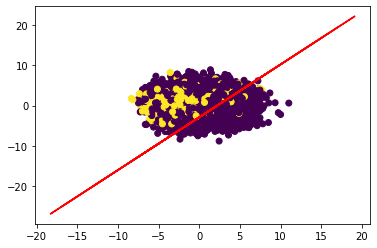

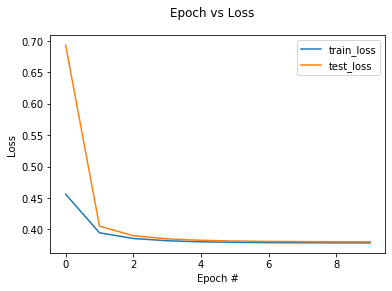

In [20]:
W = np.zeros_like(X_train[0])# initialize weights
b = 0                        # initialize bias
eta0  = 0.0001               # learning rate
alpha = 0.0001               # constant which multipied to L2 regularization
batch_size=1                 # batch size for sgd


print("[INFO] starting training...")

# initialize a list to store the loss value for each epoch
lossHistory = []
losstest =[]

# loop over the desired number of epochs
for epoch in np.arange(0, 10):
    epochLoss = []
    epochtest =[]
    test=[]
    pred_test=sigmoid_activation(X_test.dot(W)+b)
	# error_test=pred_test-y_test
	# q=abs(error_test)
    loss_test = y_test*np.log(pred_test)+(1-y_test)*np.log(1-pred_test)

    epochtest.append(abs(loss_test))



	# loop over our data in batches
    for (batchX, batchY) in next_batch(X_train, y_train, batch_size): #current code is compiatable for only batch size 1 please free to modify to any batch size
        # take the dot product between our current batch of
        # features and weight matrix `W`, then pass this value
        # through the sigmoid activation function
        preds = sigmoid_activation(batchX.dot(W)+b)

        # now that we have our predictions, we need to determine
        # our `error`, which is the difference between our predictions
        # and the true values
        error = preds - batchY
        s=abs(error)


        # given our `error`, we can compute the total loss value on
        # the batch as the sum of squared loss
        loss = batchY*np.log(preds)+(1-batchY)*np.log(1-preds)

        #loss = np.sum(error ** 2)
        epochLoss.append(abs(loss))



        # the gradient update is therefore the dot product between
        # the transpose of our current batch and the error on the
        # # batch
        gradient = batchX.T.dot(error) / batchX.shape[0] -((alpha)/batchX.shape[0])*W

        # use the gradient computed on the current batch to take
        # a "step" in the correct direction
        W +=   -eta0 * gradient
        b += -eta0*error

    # update our loss history list by taking the average loss
    # across all batches
    lossHistory.append(np.average(epochLoss))
    losstest.append(np.average(epochtest))

# compute the line of best fit by setting the sigmoid function
# to 0 and solving for X2 in terms of X1
Y = (-W[0] - (W[1] * X_train)) / W[2]

# plot the original data along with our line of best fit
plt.figure()
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)
plt.plot(X_train, Y, "r-")
# construct a figure that plots the loss over time
fig = plt.figure()
plt.plot(np.arange(0,10), lossHistory,label = "train_loss")
plt.plot(np.arange(0,10), losstest,label = "test_loss")
fig.suptitle("Epoch vs Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend() 
plt.show()

In [21]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        if sigmoid(W, X[i], b) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)
print('Train accuracy')
print(1-np.sum(y_train - pred(W,b,X_train))/len(X_train))
print('='*25)
print('Test accuracy')
print(1-np.sum(y_test  - pred(W,b,X_test))/len(X_test))

Train accuracy
0.9554133333333333
Test accuracy
0.95296


In [22]:
W-clf.coef_, clf.coef_.shape, b-clf.intercept_

(array([[-6.99735029e-05,  5.59907877e-03,  2.54469960e-03,
         -3.11029141e-03, -4.04381494e-03,  5.45256230e-03,
          6.87579892e-03,  2.34677210e-03,  8.81868548e-03,
         -1.08906686e-02, -1.68767678e-03, -1.94683987e-03,
          1.69748804e-03,  4.59826266e-04, -5.27691669e-04]]),
 (1, 15),
 array([0.00245376]))